In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv("happiness_score_dataset.csv")

In [4]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
data_column = ['Country','Region','Happiness Rank','Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity']

In [6]:
data = data[data_column].copy()

In [7]:
happy_df = data.rename({'Country':'country','Region':'region','Happiness Rank':'happiness_rank','Happiness Score':'happiness_score','Economy (GDP per Capita)':'economy','Family':'family','Health (Life Expectancy)':'health','Freedom':'freedom','Trust (Government Corruption)':'trust','Generosity':'generosity'},axis=1)

In [8]:
happy_df.head()

,country,region,happiness_rank,happiness_score,economy,family,health,freedom,trust,generosity
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


Text(0, 0.5, 'Economy')

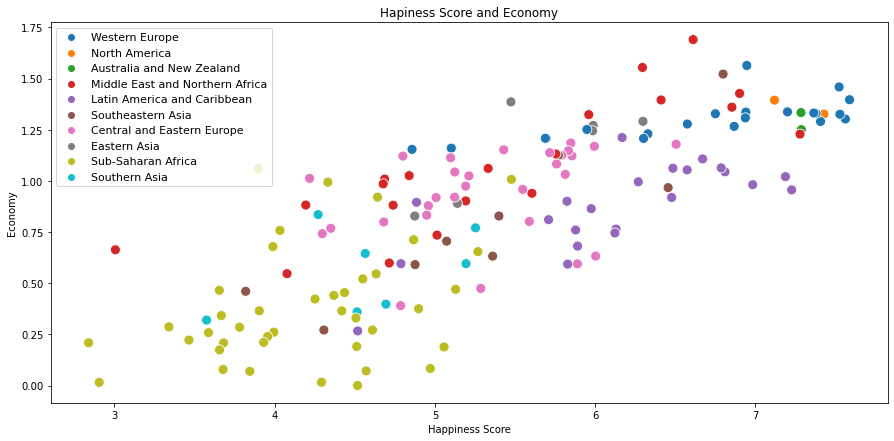

In [9]:
plt.rcParams['figure.figsize'] =(15,7) 
plt.title("Hapiness Score and Economy") 
sns.scatterplot(x = happy_df.happiness_score,y = happy_df.economy,hue =happy_df.region, s = 100); 
plt.legend (loc='upper left',fontsize=11) 
plt.xlabel('Happiness Score') 
plt.ylabel('Economy')

In [10]:
gdp = happy_df.groupby('region')['economy'].sum()

In [11]:
gdp

region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: economy, dtype: float64

Text(0, 0.5, '')

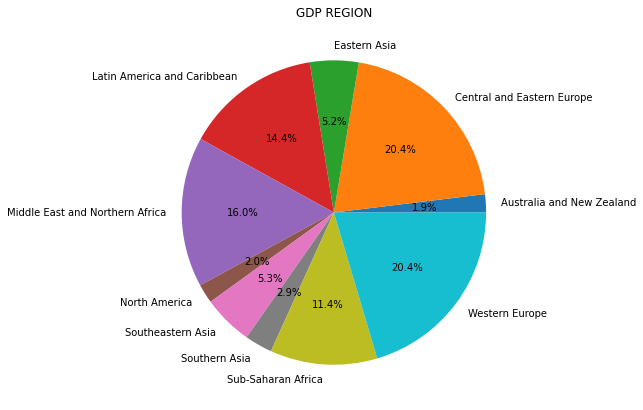

In [12]:
gdp.plot.pie(autopct ='%1.1f%%')
plt.title('GDP REGION')
plt.ylabel('')

In [13]:
total_country = happy_df.groupby('region')[['country']].count()

In [14]:
total_country

,country
region,
Australia and New Zealand,2
Central and Eastern Europe,29
Eastern Asia,6
Latin America and Caribbean,22
Middle East and Northern Africa,20
North America,2
Southeastern Asia,9
Southern Asia,7
Sub-Saharan Africa,40


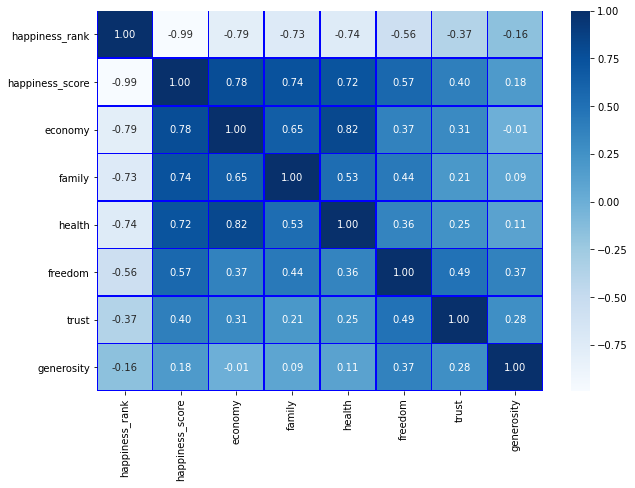

In [15]:
cor =happy_df.corr(method ="pearson")
f, ax = plt.subplots(figsize=(10,7))
sns.heatmap(cor,linewidths=0.5,linecolor="blue", annot=True, fmt= '.2f',cmap = 'Blues')
plt.yticks(rotation=0);

In [16]:
Trust_issue = happy_df.groupby('region')[['trust']].mean()

In [17]:
Trust_issue

,trust
region,
Australia and New Zealand,0.392795
Central and Eastern Europe,0.086674
Eastern Asia,0.127695
Latin America and Caribbean,0.117172
Middle East and Northern Africa,0.181702
North America,0.244235
Southeastern Asia,0.151276
Southern Asia,0.102536
Sub-Saharan Africa,0.123878


<BarContainer object of 10 artists>

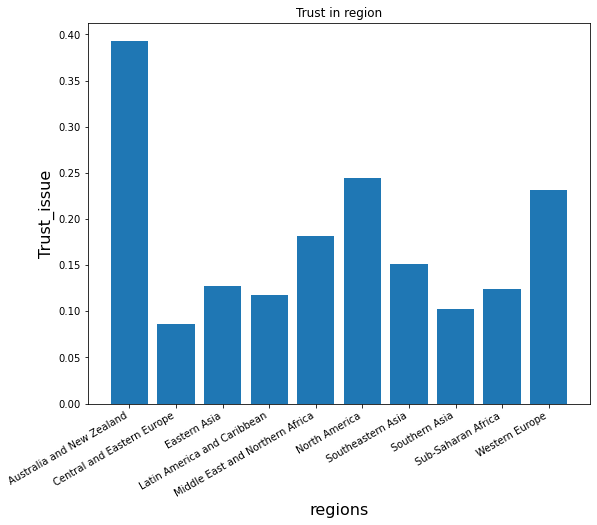

In [18]:
plt.figure(figsize=(9,7))
plt.ylabel('Trust_issue', fontsize=16)
plt.xlabel('regions', fontsize=16)
plt.title('Trust in region')
plt.xticks(rotation = 30 , ha='right')
plt.bar(Trust_issue.index,Trust_issue.trust)

In [25]:
top_10 = happy_df.head(10)
bottom_10 = happy_df.tail(10)

<ipython-input-28-3263abb902d0>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(xlabels,rotation = 45 , ha ="right")
<ipython-input-28-3263abb902d0>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(xlabels,rotation = 45 , ha ="right")


Text(603.9818181818181, 0.5, 'Health')

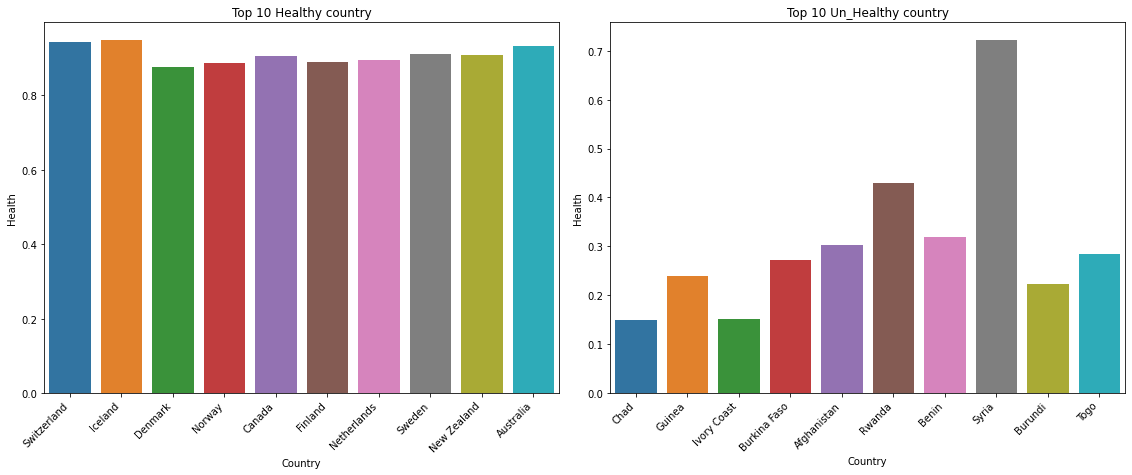

In [28]:
fig, axes = plt.subplots(1,2,figsize = (16,6))
plt.tight_layout(pad = 2)
xlabels= top_10.country 
axes[0].set_title ('Top 10 Healthy country')
axes[0].set_xticklabels(xlabels,rotation = 45 , ha ="right")
sns.barplot(x=top_10.country,y=top_10.health,ax=axes[0])
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Health')

xlabels = bottom_10.country 
axes[1].set_title ('Top 10 Un_Healthy country')
axes[1].set_xticklabels(xlabels,rotation = 45 , ha ="right")
sns.barplot(x=bottom_10.country,y=bottom_10.health,ax=axes[1])
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Health')




Text(0, 0.5, 'Happiness_Score')

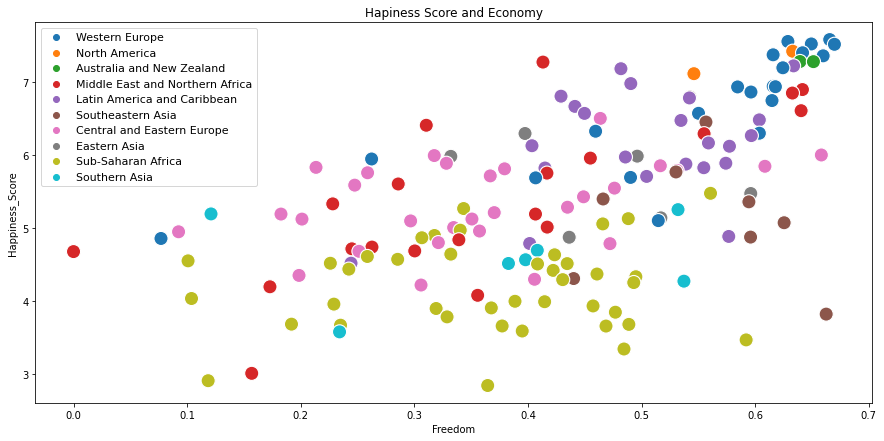

In [30]:
plt.rcParams['figure.figsize'] =(15,7) 
plt.title("Hapiness Score and Economy") 
sns.scatterplot(x = happy_df.freedom,y = happy_df.happiness_score,hue =happy_df.region, s = 200); 
plt.legend (loc='upper left',fontsize=11) 
plt.xlabel('Freedom') 
plt.ylabel('Happiness_Score')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

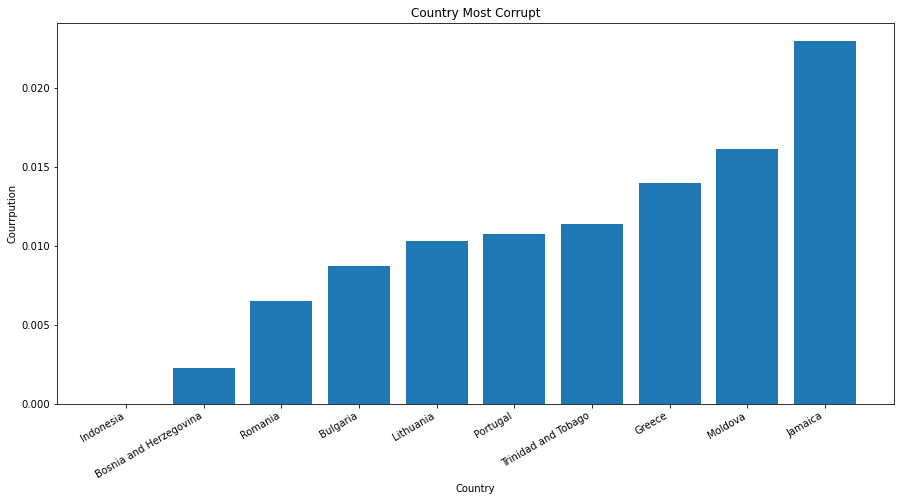

In [33]:
country = happy_df.sort_values(by = 'trust').head(10)
plt.rcParams['figure.figsize'] =(15,7) 
plt.title("Country Most Corrupt")  
plt.bar(country.country , country.trust)
plt.xlabel('Country') 
plt.ylabel('Courrpution')
plt.xticks(rotation = 30 , ha ='right')

Text(0, 0.5, 'Happiness_Score')

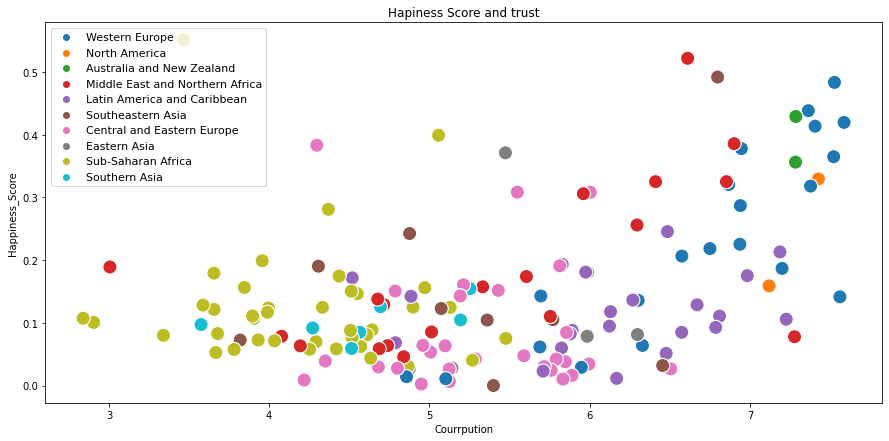

In [39]:
plt.rcParams['figure.figsize'] =(15,7)
plt.title("Hapiness Score and trust") 
sns.scatterplot(x = happy_df.happiness_score,y = happy_df.trust, hue = happy_df.region, s = 200); 
plt.legend (loc='upper left',fontsize=11) 
plt.xlabel('Courrpution') 
plt.ylabel('Happiness_Score')